In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, confusion_matrix ,roc_curve, classification_report,accuracy_score,precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets import make_classification

In [127]:
data = pd.read_csv("bank.csv")

le = LabelEncoder()
data["pep"] = le.fit_transform(data["pep"])
data["sex"] = le.fit_transform(data["sex"])
data["region"] = le.fit_transform(data["region"])
data["married"] = le.fit_transform(data["married"])
data["car"] = le.fit_transform(data["car"])
data["save_act"] = le.fit_transform(data["save_act"])
data["current_act"] = le.fit_transform(data["current_act"])
data["mortgage"] = le.fit_transform(data["mortgage"])
data = data.dropna()
x = data.drop(["id","pep"],axis=1)
y = data["pep"]


In [128]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=16)
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

c:\Users\ChissanuPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [129]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[56, 20],
       [42, 32]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

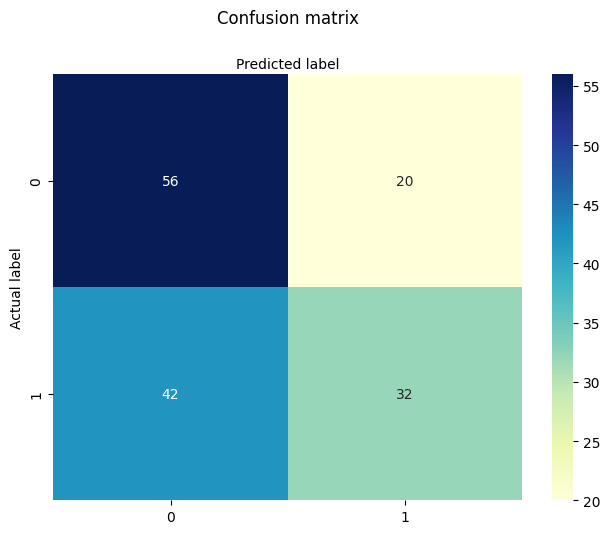

In [130]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [131]:
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.57      0.74      0.64        76
   with diabetes       0.62      0.43      0.51        74

        accuracy                           0.59       150
       macro avg       0.59      0.58      0.58       150
    weighted avg       0.59      0.59      0.58       150



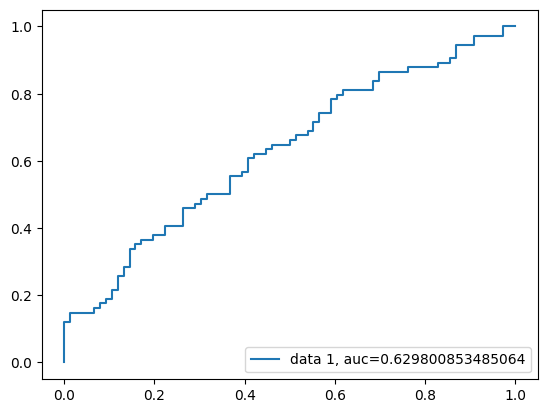

In [132]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [133]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))
# Model Precision, how consistent is the classifier?
print("Precision:",precision_score(y_test, y_pred))

Accuracy: 0.5866666666666667
Precision: 0.6153846153846154


In [134]:

# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
x, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.934333 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [135]:

logreg = LogisticRegression(C=100, penalty='l2', solver='lbfgs')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))
# Model Precision, how consistent is the classifier?
print("Precision:",precision_score(y_test, y_pred))

Accuracy: 0.5866666666666667
Precision: 0.62


c:\Users\ChissanuPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
